In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Load DataSets

In [2]:
train_data= pd.read_csv('C:/Datasets/playground-series-s3e12/train.csv')
test_data= pd.read_csv('C:/Datasets/playground-series-s3e12/test.csv')
original_data= pd.read_csv('C:/Datasets/playground-series-s3e12/kindey stone urine analysis.csv')

In [3]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4),

(None, None)

# Definition of Features

**id**-identification
>**target** - Probability it is a kidney stone 

**gravity(normal -1.002 to 1.030)**- 
>Urine gravity refers to the concentration of particles in the urine, specifically the amount of dissolved solids, such as salts and minerals.higher urine gravity values can indicate dehydration or the presence of certain medical conditions that increase the risk of developing kidney stones.

**ph (normal - 4.5 to 8.0 where 7.0 is neutral)**- 
>High urine pH levels can increase the risk of struvite or calcium phosphate stones, while low urine pH levels can increase the risk of uric acid stones.

**osmo(normal 50 to 1400 milliosmoles per kilogram (mOsm/kg).)** -
>High urine osmolality can increase the risk of certain types of kidney stones, including calcium oxalate and calcium phosphate stones.

**cond (the normal range for urine conductivity is between 50 and 1,500 microsiemens per centimeter (μS/cm))** 
>Urine conductivity is a measure of the ability of urine to conduct an electrical current, and it is influenced by the concentration of dissolved ions in the urine, including calcium, sodium, potassium, and magnesium.

**urea**
> A waste product of protein metabolism that is excreted by the kidneys.

**calc (concentration of calcium in urine -(between 100 and 300 mg/dL or 2.5 and 7.5 mmol/L.))**
> Calcium concentration refers to the amount of calcium ions (Ca2+) present in a given volume of urine or other biological fluid.

**create a new feature**
* osomlarity is directly proportional to gravity
* The higher the PH the higher the the concentration of calcium**directly propotional**
* The lower the PH the higher the urea(uric acid)**inversely propotional**
* no of particle per calcium = osomlarity/(conc of calcium *vant hoff factor)
* no of particle per urea = osomlarity/(urea *vant hoff factor)

# Feature Engineering

In [4]:
"""train_data['Osmo_gravity'] = train_data['osmo']/train_data['gravity']
train_data['PH_calc'] = train_data['ph']/train_data['calc']
train_data['PH_urea'] = train_data['ph']*train_data['urea']
train_data['particle_calc'] = train_data['osmo']/(train_data['calc'])
train_data['particle_urea'] = train_data['osmo']/(train_data['urea'])"""


class UrineAnalysis:
    
    def __init__(self, data):
        self.data = data
    
    def calculate_osmo_gravity(self):
        self.data['Osmo_gravity'] = self.data['osmo'] / self.data['gravity']
        
    def calculate_ph_calc(self):
        self.data['PH_calc'] = self.data['ph'] / self.data['calc']
        
    def calculate_ph_urea(self):
        self.data['PH_urea'] = self.data['ph'] * self.data['urea']
        
    def calculate_particle_calc(self):
        self.data['particle_calc'] = self.data['osmo'] / self.data['calc']
        
    def calculate_particle_urea(self):
        self.data['particle_urea'] = self.data['osmo'] / self.data['urea']

In [5]:
train_data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
targetVar = train_data.target
inputVariable = train_data.drop(['target','id'],axis=1)

In [ ]:
urine_analysis = UrineAnalysis(inputVariable)

# Use the class methods to calculate new variables and add them to the dataset
urine_analysis.calculate_osmo_gravity()
urine_analysis.calculate_ph_calc()
urine_analysis.calculate_ph_urea()
urine_analysis.calculate_particle_calc()
urine_analysis.calculate_particle_urea()

# Display the updated dataset
inputVariable.head()

In [7]:
inputVariable.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

In [8]:
inputVariable.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [9]:
inputVariable.duplicated().sum()

0

# EDA

what is the  correlation osmolality  w

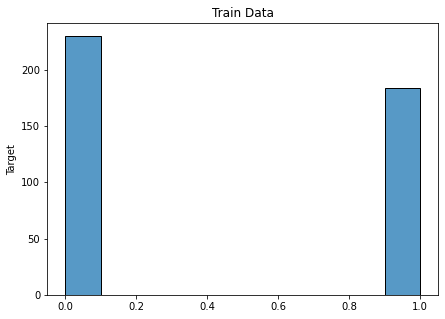

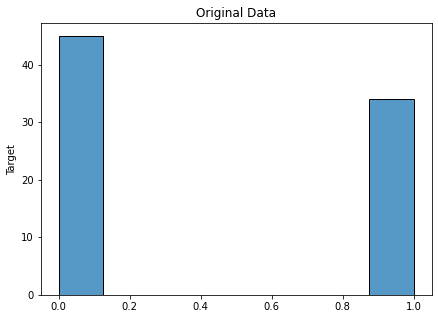

In [11]:
plt.figure(figsize=(7,5))
p = sns.histplot(data=train_data, x="target")
p.set(xlabel = None)
p.set(ylabel = 'Target')
plt.title('Train Data')
plt.show()

plt.figure(figsize=(7,5))
p = sns.histplot(data=original_data, x="target")
p.set(xlabel = None)
p.set(ylabel = 'Target')
plt.title('Original Data')
plt.show()

what does the above say?

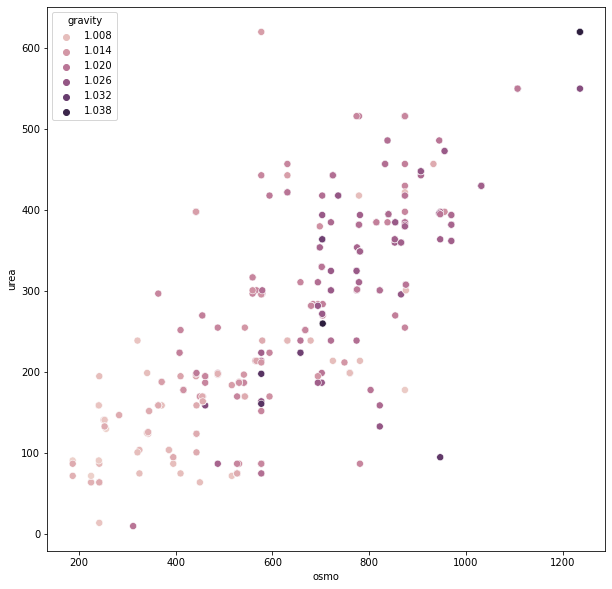

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='osmo', y='urea', hue='gravity',data=train_data,s=50)
plt.show()

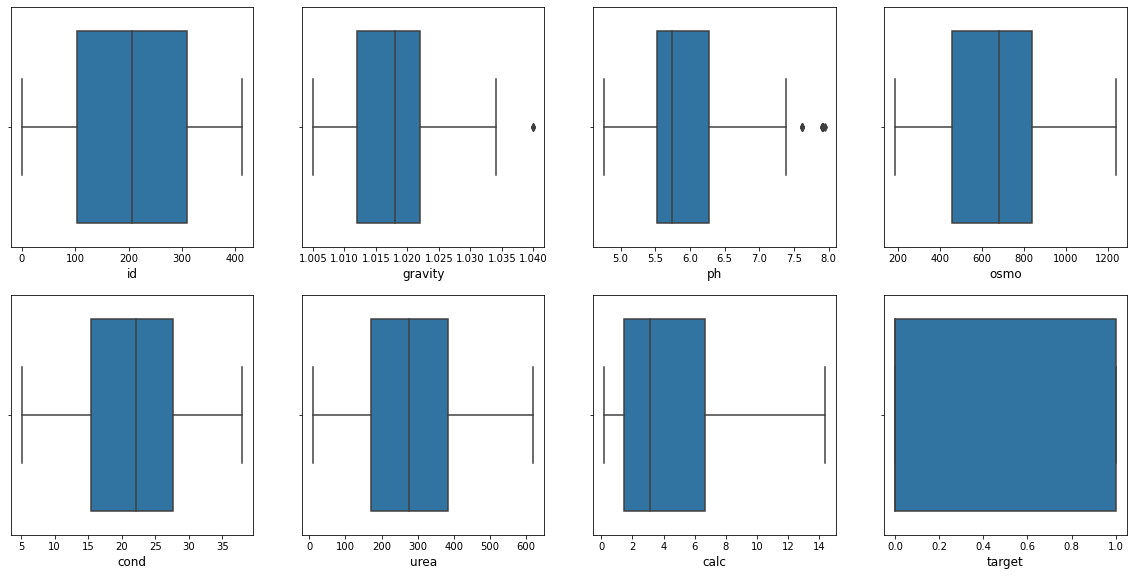

In [13]:
plt.figure(figsize=(20, 15))
for i in range(len(train_data.columns)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x =train_data.iloc[:, i])
    plt.xlabel(train_data.columns[i], size =12)

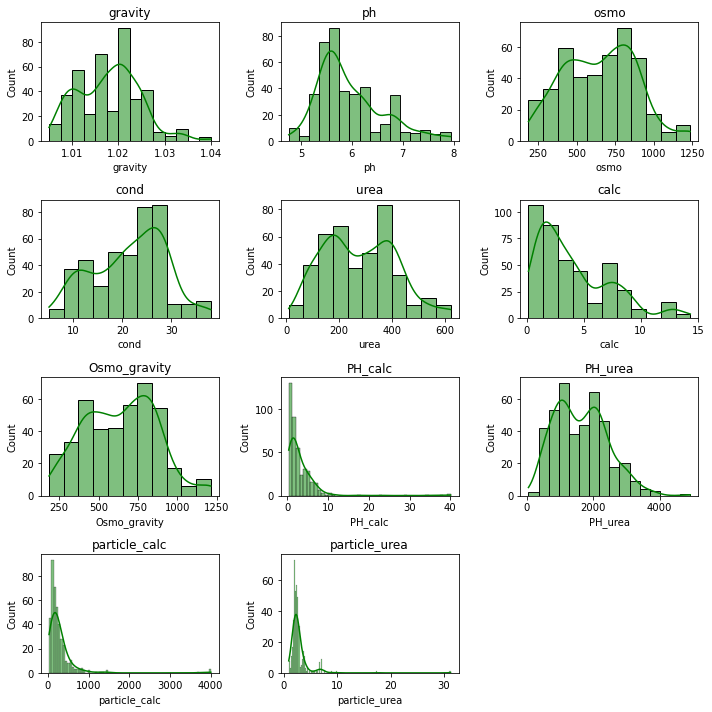

In [14]:
"""for i in inputVariable.columns:
    sns.distplot(inputVariable[i], hist=True, kde=False, 
                 bins=int(180/5), color = 'blue',
                 hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title(i)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.show("""

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if i < len(inputVariable.columns):
        sns.histplot(inputVariable.iloc[:,i], ax=ax, kde=True, color='green')
        ax.set(title=inputVariable.columns[i])
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show()

In [18]:
train_data.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [17]:
inputVariable.describe()

,gravity,ph,osmo,cond,urea,calc,Osmo_gravity,PH_calc,PH_urea,particle_calc,particle_urea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,639.076188,3.159409,1635.074783,292.856321,2.796164
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,227.658735,4.454039,792.299822,417.869909,2.021649
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,184.965381,0.359833,47.600000,28.706625,0.930645
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,447.717555,0.883925,980.995000,113.884171,2.024554
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,668.633235,1.882716,1600.345000,195.100223,2.364103
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,819.113212,4.192340,2168.440000,324.467655,2.780488
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1211.764706,40.058824,4922.800000,4000.000000,31.200000


<AxesSubplot:>

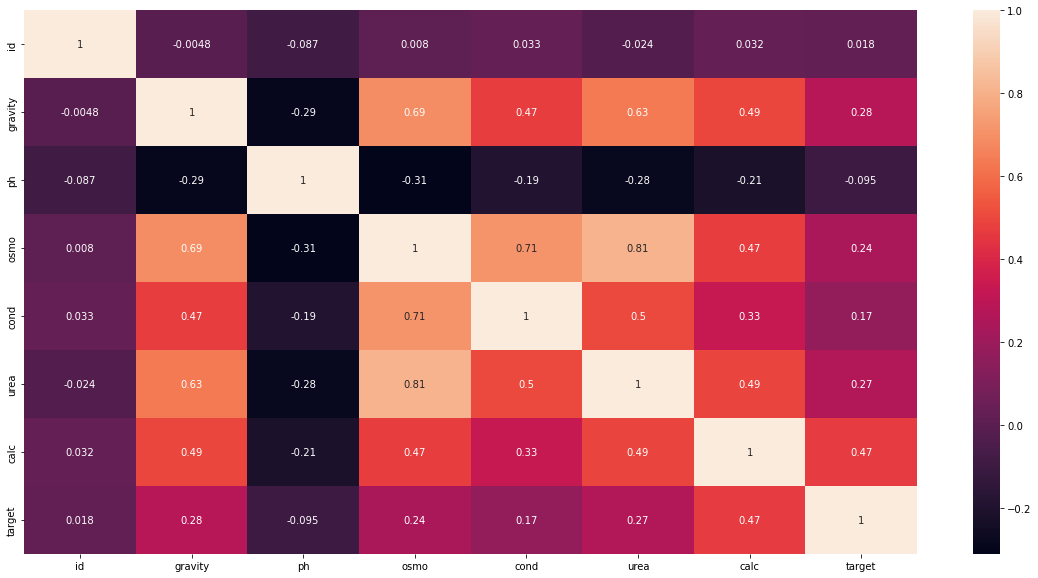

In [15]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(train_data.corr(), annot= True)

<AxesSubplot:>

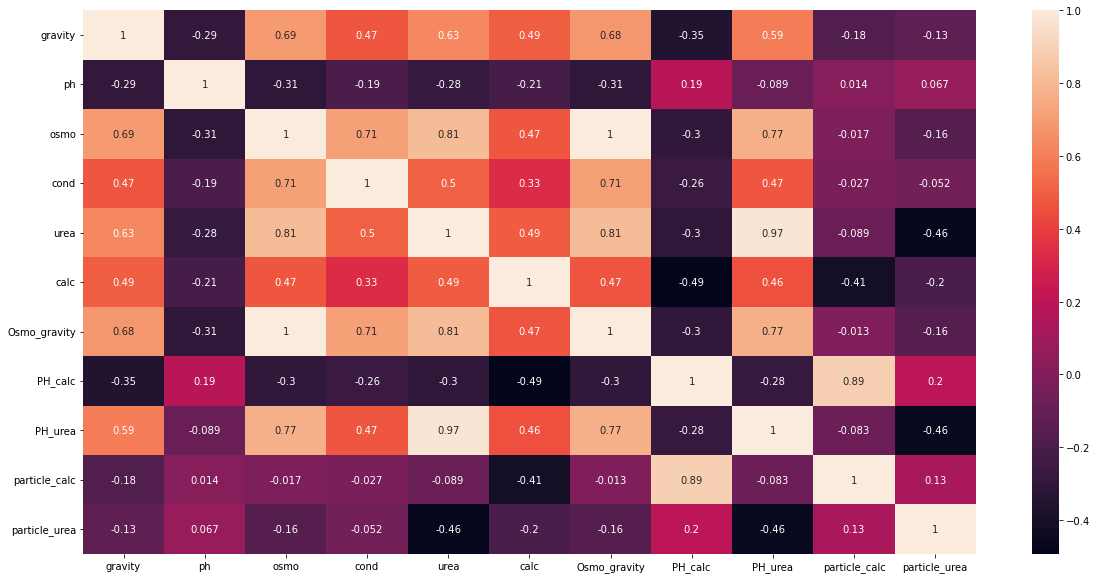

In [16]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(inputVariable.corr(), annot= True)

In [19]:

from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as Rsquared, log_loss
import warnings
warnings.filterwarnings('ignore')
import time

In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(inputVariable,targetVar,test_size=0.2,random_state=42)

In [21]:
cat_model = CatBoostClassifier(iterations=50,max_depth=4,eta=0.1,
                               random_seed=8,reg_lambda=20,bootstrap_type='Bayesian')
cat_model.fit(Xtrain,Ytrain)
Y_predictn = cat_model.predict_proba(Xtest)
logloss = log_loss(Ytest, Y_predictn)
print(logloss)

0:	learn: 0.6846250	total: 174ms	remaining: 8.51s
1:	learn: 0.6751363	total: 177ms	remaining: 4.24s
2:	learn: 0.6654451	total: 179ms	remaining: 2.81s
3:	learn: 0.6584213	total: 181ms	remaining: 2.08s
4:	learn: 0.6521413	total: 183ms	remaining: 1.65s
5:	learn: 0.6444987	total: 185ms	remaining: 1.36s
6:	learn: 0.6384616	total: 186ms	remaining: 1.14s
7:	learn: 0.6320750	total: 188ms	remaining: 986ms
8:	learn: 0.6258314	total: 189ms	remaining: 861ms
9:	learn: 0.6194054	total: 190ms	remaining: 760ms
10:	learn: 0.6122751	total: 191ms	remaining: 678ms
11:	learn: 0.6051918	total: 192ms	remaining: 609ms
12:	learn: 0.6009665	total: 194ms	remaining: 551ms
13:	learn: 0.5975446	total: 195ms	remaining: 501ms
14:	learn: 0.5929158	total: 196ms	remaining: 457ms
15:	learn: 0.5894896	total: 197ms	remaining: 418ms
16:	learn: 0.5854222	total: 198ms	remaining: 384ms
17:	learn: 0.5809507	total: 198ms	remaining: 353ms
18:	learn: 0.5772559	total: 199ms	remaining: 325ms
19:	learn: 0.5755098	total: 200ms	remaini